# Mapping out the present state of the game

In [227]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import puzz

In [228]:
net = puzz.Network(['normal', 'death exploit'])

### planned nodes

separate invulnerable and "no physical damage"
asphyxiation vs. not

how do you defeat a vampire?

"sneak past vampire" and "kill vampire" separate?
right now assumed "kill vampire" and "kill ethereal"

In [229]:
# current obstacles
net.add_obstacle('cave1')
net.add_obstacle('arrow trap')
net.add_obstacle('knight')
net.add_obstacle('volcano')
net.add_obstacle('fireman')
net.add_obstacle('farmer store')
net.add_obstacle('eggplant commercial')
net.add_obstacle('first commercial')

# planned obstacles
net.add_obstacle('locked door')
net.add_obstacle('fast-moving target')
net.add_obstacle('ethereal damage')
net.add_obstacle('asphyxiation maze')
net.add_obstacle('pit')
net.add_obstacle('cliff')
net.add_obstacle('small monsters')
net.add_obstacle('binary tree of death')
net.add_obstacle('large magnet')
net.add_obstacle('fixed obstacle')
net.add_obstacle('heavy obstacle')
net.add_obstacle('large damage')
net.add_obstacle('moon')
net.add_obstacle('kill ethereal monster')
net.add_obstacle('kill vampire')

# current abilities
net.add_ability('strength')
net.add_ability('fireproof')
net.add_ability('armor')
net.add_ability('money')
net.add_ability('eggplant')
net.add_ability('duplicator')
net.add_ability('hypnosis')
net.add_ability('fireproof')

# planned abilities
net.add_ability('ethereal')
net.add_ability('damage etheral')
net.add_ability('invulnerable')
net.add_ability('invisible')
net.add_ability('telepathy')
net.add_ability('nullify')
net.add_ability('elective vomit')
net.add_ability('eat all')
net.add_ability('spaceflight')
net.add_ability('reanimate dead')
net.add_ability('vampirism')
net.add_ability('teleporter')

In [230]:
net.defeats('normal', 'fireman')

net.defeats('death exploit', 'cave1')

net.defeats('armor', 'arrow trap')

net.defeats('fireproof', 'volcano')

net.defeats('strength', 'knight')
net.defeats('strength', 'heavy obstacle')

net.defeats('normal', 'first commercial')
net.defeats('money', 'farmer store')
net.defeats('eggplant', 'eggplant commercial')

net.defeats(('teleporter', 'death exploit'), 'asphyxiation maze')

net.defeats('vampirism', 'asphyxiation maze')

net.defeats('spaceflight', 'moon')

net.defeats('nullify', 'locked door')
net.defeats('nullify', 'fast-moving target')
net.defeats('nullify', 'knight')
net.defeats('nullify', 'heavy obstacle')
net.defeats('nullify', 'fixed obstacle')
net.defeats('nullify', 'large magnet')

net.defeats('telepathy', 'binary tree of death')

net.defeats('invisible', 'knight')
net.defeats('invisible', 'small monsters')

net.defeats('damage etheral', 'fireman')
net.defeats('damage etheral', 'knight')
net.defeats('damage etheral', 'small monsters')
net.defeats('damage etheral', 'kill ethereal monster')

net.defeats('ethereal', 'locked door')
net.defeats('ethereal', 'large damage')
net.defeats('ethereal', 'knight')
net.defeats('ethereal', 'fixed obstacle')
net.defeats('ethereal', 'small monsters')
net.defeats('ethereal', 'volcano')
net.defeats('ethereal', 'arrow trap')

net.defeats('hypnosis', 'knight')
net.defeats('hypnosis', 'fireman')
net.defeats('hypnosis', 'knight')

net.defeats('invulnerable', 'knight')
net.defeats('invulnerable', 'small monsters')
net.defeats('invulnerable', 'ethereal damage')
net.defeats('invulnerable', 'volcano')
net.defeats('invulnerable', 'arrow trap')

### the current layout of the game

In [231]:
net.add_connection('start', 'fireman')
net.add_connection('fireman', 'fireproof')

net.add_connection('start', 'volcano')
net.add_connection('start', 'cave1')
net.add_connection('start', 'first commercial')
net.add_connection('first commercial', 'money')
net.add_connection('start', 'farmer store')

net.add_connection('farmer store', 'eggplant')
net.add_connection('first commercial', 'eggplant commercial')
net.add_connection('eggplant commercial', 'duplicator')

net.add_connection('death exploit', 'cave1')
net.add_connection('cave1', 'strength')
net.add_connection('strength', 'knight')
net.add_connection('knight', 'armor')
net.add_connection('armor', 'arrow trap')

net.add_connection('normal', 'fireman')
net.add_connection('fireproof', 'volcano')

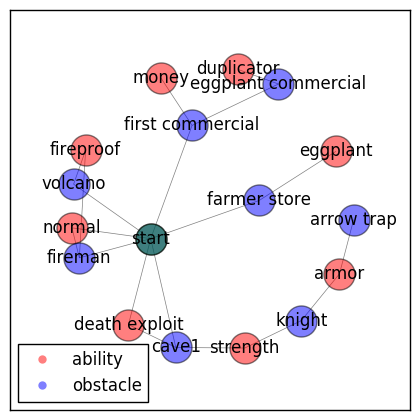

In [236]:
net.plot(spring=True)

In [233]:
net.enabled_nodes('arrow trap', suppress_live=True)

{'eat all': set(),
 'elective vomit': set(),
 'heavy obstacle': {'strength'},
 'hypnosis': set(),
 'invisible': set(),
 'nullify': {'strength'},
 'reanimate dead': set(),
 'spaceflight': set(),
 'telepathy': set(),
 'teleporter': set(),
 'vampirism': set()}